In [2]:
import pandas as pd

In [3]:
migration_data = pd.read_csv("migration data.csv")

In [4]:
migration_data

,Index,"Region, development group, country or area",Location code,1990,1995,2000,2005,2010,2015,2020
0,102,South-Eastern Asia,920,7 725 395,9 694 248,12 088 166,14 537 009,18 113 912,20 787 865,23 580 736
1,103,Brunei Darussalam,96,26 323,35 052,45 242,45 314,44 541,45 110,45 340
2,104,Cambodia,116,355 428,418 213,459 621,674 436,953 059,1 074 572,1 104 819
3,105,Indonesia,360,1 622 259,1 937 233,2 415 077,2 781 287,3 415 963,4 065 095,4 601 369
4,106,Lao People's Democratic Republic,418,483 008,547 786,649 287,897 002,1 198 862,1 288 179,1 296 051
5,107,Malaysia*,458,560 353,861 208,1 201 135,1 379 305,1 599 061,1 781 038,1 860 037
6,108,Myanmar,104,685 308,911 445,1 224 310,1 736 590,2 492 274,2 842 494,3 711 751
7,109,Philippines,608,2 012 499,2 481 963,3 062 665,3 684 528,4 692 695,5 498 232,6 094 307
8,110,Singapore,702,156 444,168 100,192 930,235 683,282 421,324 639,348 464
9,111,Thailand,764,306 924,411 878,531 028,631 678,769 257,921 690,1 086 985


In [5]:
df_obj = migration_data.select_dtypes(['object'])
df_obj = df_obj.iloc[:,1:]

In [6]:
migration_data[df_obj.columns] = df_obj.apply(lambda x : x.str.replace(" ",""))

In [7]:
for i in range(1990,2021,5):
    migration_data[str(i)] = pd.to_numeric(migration_data[str(i)])

In [8]:
migration_data

,Index,"Region, development group, country or area",Location code,1990,1995,2000,2005,2010,2015,2020
0,102,South-Eastern Asia,920,7725395,9694248,12088166,14537009,18113912,20787865,23580736
1,103,Brunei Darussalam,96,26323,35052,45242,45314,44541,45110,45340
2,104,Cambodia,116,355428,418213,459621,674436,953059,1074572,1104819
3,105,Indonesia,360,1622259,1937233,2415077,2781287,3415963,4065095,4601369
4,106,Lao People's Democratic Republic,418,483008,547786,649287,897002,1198862,1288179,1296051
5,107,Malaysia*,458,560353,861208,1201135,1379305,1599061,1781038,1860037
6,108,Myanmar,104,685308,911445,1224310,1736590,2492274,2842494,3711751
7,109,Philippines,608,2012499,2481963,3062665,3684528,4692695,5498232,6094307
8,110,Singapore,702,156444,168100,192930,235683,282421,324639,348464
9,111,Thailand,764,306924,411878,531028,631678,769257,921690,1086985


In [9]:
migration_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Index                                       12 non-null     int64 
 1   Region, development group, country or area  12 non-null     object
 2   Location code                               12 non-null     int64 
 3   1990                                        12 non-null     int64 
 4   1995                                        12 non-null     int64 
 5   2000                                        12 non-null     int64 
 6   2005                                        12 non-null     int64 
 7   2010                                        12 non-null     int64 
 8   2015                                        12 non-null     int64 
 9   2020                                        12 non-null     int64 
dtypes: int64(9), object(1)
memor

In [10]:
for i in range(1990,2020) :
    if i not in pd.to_numeric(df_obj.columns) :
        migration_data[str(i)] = 0

In [11]:
column_names = list(migration_data.columns[:3]) + sorted(migration_data.columns[3:])

In [12]:
migration_data = migration_data.reindex(columns = column_names)

In [13]:
for i in range(1990,2016,5):
    for j in range(len(migration_data)):
        y1 = migration_data[str(i)][j]
        y2 = migration_data[str(i+5)][j]
        
        for k in range(4):
            migration_data[str(i+k+1)][j] = y1 + (y2 - y1) / 5 * (k+1)

<ipython-input-13-946daa8f4840>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration_data[str(i+k+1)][j] = y1 + (y2 - y1) / 5 * (k+1)


In [14]:
migration_data

,Index,"Region, development group, country or area",Location code,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,102,South-Eastern Asia,920,7725395,8119165,8512936,8906706,9300477,9694248,10173031,...,18648702,19183493,19718283,20253074,20787865,21346439,21905013,22463587,23022161,23580736
1,103,Brunei Darussalam,96,26323,28068,29814,31560,33306,35052,37090,...,44654,44768,44882,44996,45110,45156,45202,45248,45294,45340
2,104,Cambodia,116,355428,367985,380542,393099,405656,418213,426494,...,977361,1001664,1025966,1050269,1074572,1080621,1086670,1092720,1098769,1104819
3,105,Indonesia,360,1622259,1685253,1748248,1811243,1874238,1937233,2032801,...,3545789,3675615,3805442,3935268,4065095,4172349,4279604,4386859,4494114,4601369
4,106,Lao People's Democratic Republic,418,483008,495963,508919,521874,534830,547786,568086,...,1216725,1234588,1252452,1270315,1288179,1289753,1291327,1292902,1294476,1296051
5,107,Malaysia*,458,560353,620524,680695,740866,801037,861208,929193,...,1635456,1671851,1708247,1744642,1781038,1796837,1812637,1828437,1844237,1860037
6,108,Myanmar,104,685308,730535,775762,820990,866217,911445,974018,...,2562318,2632362,2702406,2772450,2842494,3016345,3190196,3364048,3537899,3711751
7,109,Philippines,608,2012499,2106391,2200284,2294177,2388070,2481963,2598103,...,4853802,5014909,5176017,5337124,5498232,5617447,5736662,5855877,5975092,6094307
8,110,Singapore,702,156444,158775,161106,163437,165768,168100,173066,...,290864,299308,307751,316195,324639,329404,334169,338934,343699,348464
9,111,Thailand,764,306924,327914,348905,369896,390887,411878,435708,...,799743,830230,860716,891203,921690,954749,987808,1020867,1053926,1086985


In [15]:
migration_data.to_csv('migration_9020.csv')

### plot

In [122]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [32]:
len(migration_data)

12

In [82]:
migration_data.iloc[2][1]

'   Cambodia'

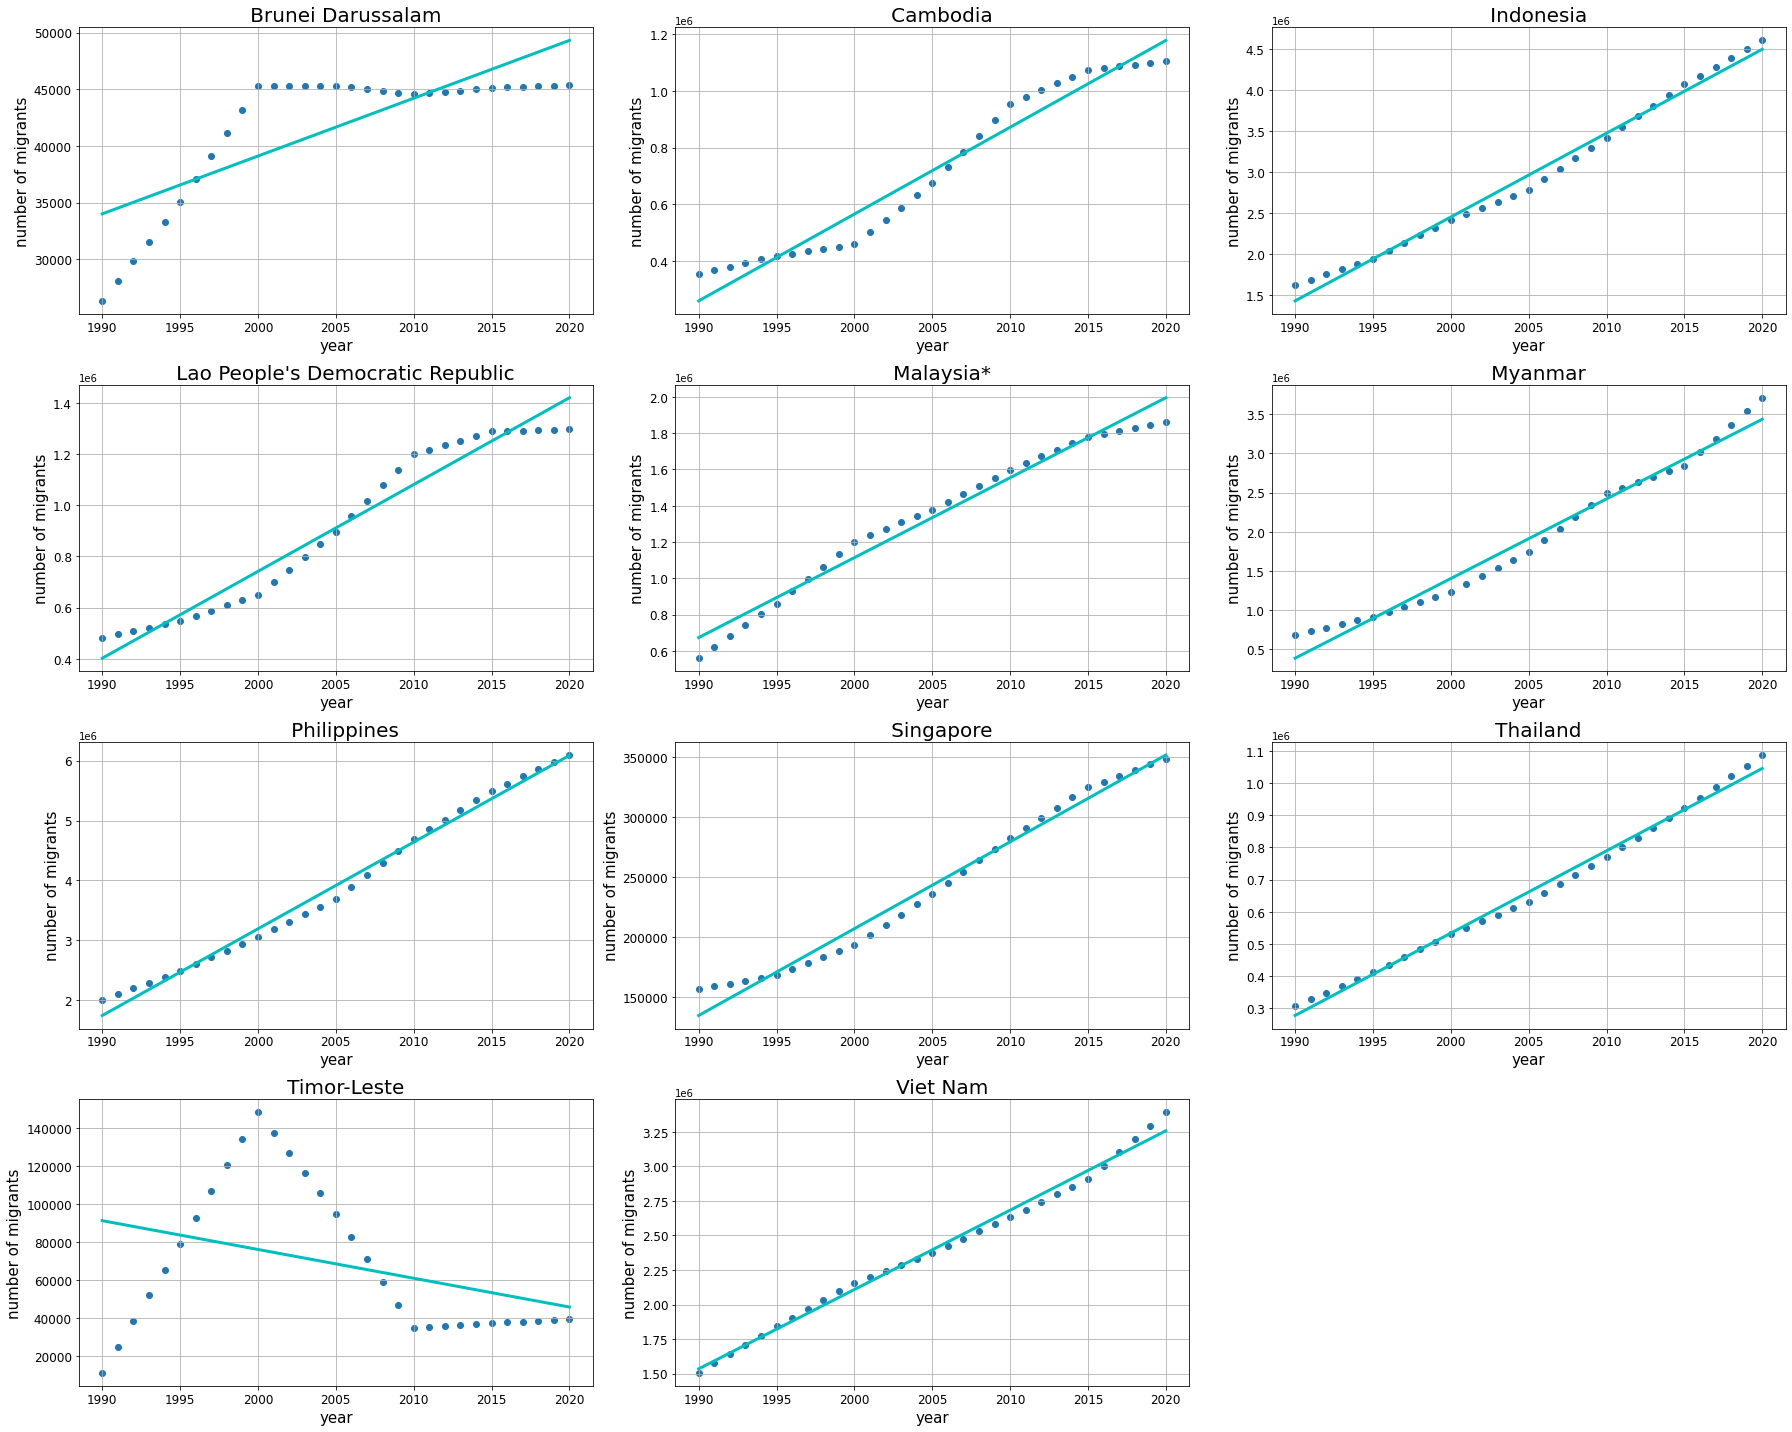

In [141]:
%matplotlib inline
plt.figure(figsize=(25,20))
model = LinearRegression()

for i in range(1,len(migration_data)):
    plt.subplot(4,3,i)
    x = np.array(range(1990,2021,1))
    y = migration_data.iloc[i][3:].values
    plt.scatter(x,y)
    plt.title(migration_data.iloc[i][1], fontsize=20)
    plt.xlabel('year', fontsize=15)
    plt.ylabel("number of migrants", fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()
    
    model.fit(x.reshape(-1,1),y)
    plt.plot(x, model.predict(x.reshape(-1,1)), c = 'c', linewidth = 3)

plt.tight_layout()